<a href="https://colab.research.google.com/github/cheikh19/DaxStudio/blob/master/TitanicCheikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importer les packages
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# Ouvrir ma base de données
df=pd.read_csv('/content/train.csv')

In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Détecter les valeurs manquantes

In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

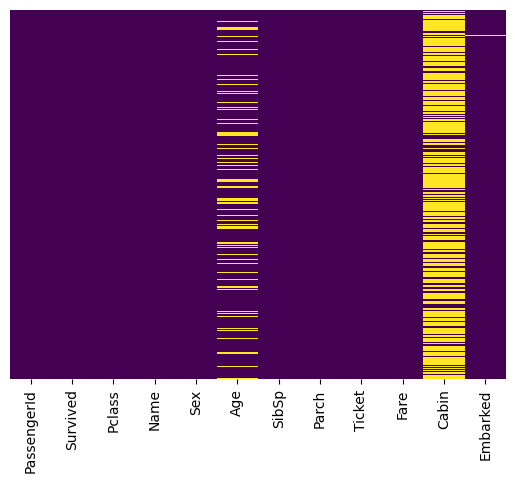

In [10]:
from matplotlib.pyplot import viridis
# utilisons une graphe
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# la base de donnnée
df.shape

(891, 12)

891 lignes et 12 colonnes

In [12]:
# Suppression des colonnes avec des valeurs manquantes
df.dropna(how='any').shape

(183, 12)

Ma base de donées est à 183 lignes et 12 colonnes
j'ai supprimé bcq de mes données et c'est pas bon pour un modele de machine learning

In [13]:
df.dropna(subset=['Age'],how='any').shape

(714, 12)

In [15]:
df['Age'].median()

28.0

In [16]:
df['Age'].fillna(df['Age'].median,inplace=True)

In [17]:
df.shape

(891, 12)

<Axes: >

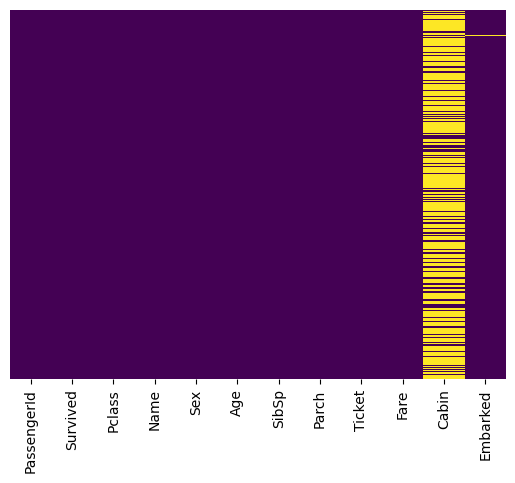

In [18]:
# representation graphique
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [21]:
df['Cabin'].fillna(value='No Cabine number', inplace=True)

In [22]:
df['Cabin'].value_counts()

No Cabine number    687
C23 C25 C27           4
G6                    4
B96 B98               4
C22 C26               3
                   ... 
E34                   1
C7                    1
C54                   1
E36                   1
C148                  1
Name: Cabin, Length: 148, dtype: int64

l'idée de remplacer No Cabine number par cabine n'est pas bonne et ça va pertuber mon mobéle : cette technique n'est pas bonne

In [30]:
# Adoptons une autre technique
# Prenons la base sous une autre apelation
df2=pd.read_csv('/content/train.csv')

In [31]:
# La technique
df2['Cabin'].fillna(method='bfill', inplace=True)

In [32]:
# Afficher la base
df2['Cabin']

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [33]:
df2['Cabin'].fillna(method='ffill', inplace=True)

In [34]:
df2['Cabin']

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890    C148
Name: Cabin, Length: 891, dtype: object

In [35]:
# Autre techniques en prenant la variable Age

df2['Age'].fillna(method='ffill', inplace=True)

In [36]:
df2['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

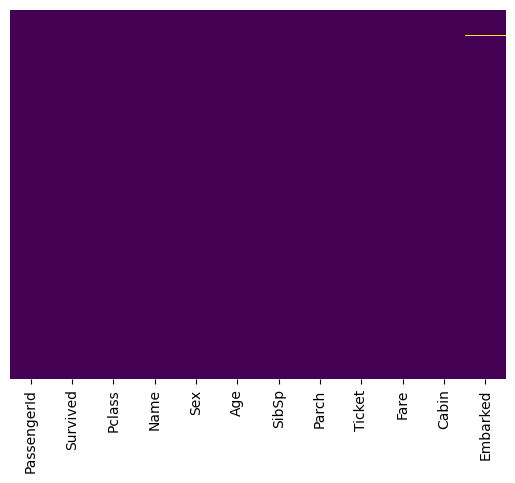

In [37]:
# Regardns graphiquement si les valeurs manquantes ont été bien nettoyées
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**featuring engineering, nettoyage des valeurs manquantes **